# CHURN PREDICTION
### By Moh. Ridwan

In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check the path
!pwd

/content


In [ ]:
# change folder
%cd '/content/drive/My Drive/LATIHAN/Final Project'

/content/drive/My Drive/LATIHAN/Final Project


In [ ]:
# check file in folder
!ls

'credit scoring train.csv'    telecom_users.csv       Video_Games_Sales.ipynb
 credit_scoring_train.ipynb   telecom_users.ipynb
 intertia_cosine_kmeans.jpg   Video_Games_Sales.csv


# Understand Business Problem and Objective

### Introduction

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. 
Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.
You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.



### Problem

There have been several customers who have left the company over the past month. The company may run out of customers in the coming months if no action is taken. Based on that, there are challenges that need to be solved.

1. How to predict churn to retain consumers who want to leave
2. How to classify consumers who are predicted to move to provide different solutions

### Objective

The task is:
1. To analyze the data and predict the churn of users (to identify people who will and will not renew their contract)
2. To find out how to classify consumers who are predicted to move to provide different solutions

# Importing The Data

In [ ]:
import pandas as pd

data = pd.read_csv('telecom_users.csv')
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# Data Understanding

In [ ]:
# shape of data
data.shape

(5986, 22)

In [ ]:
# columns/fitures name in data
data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
# searching for missings,type of data and also known the shape of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
# number of unique values for each column
data.nunique().sort_values()

Churn                  2
PaperlessBilling       2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
DeviceProtection       3
OnlineSecurity         3
InternetService        3
MultipleLines          3
OnlineBackup           3
PaymentMethod          4
tenure                73
MonthlyCharges      1526
TotalCharges        5611
customerID          5986
Unnamed: 0          5986
dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Plot Each Feature

##### Plot Curn Column

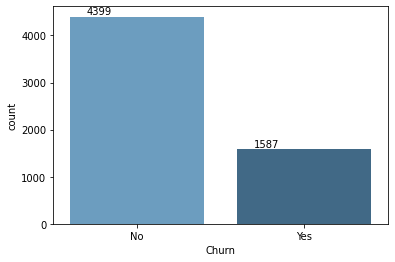

In [ ]:
ax= sns.countplot(x='Churn', data=data, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
print((1587/5986)*100,'%')

26.511861009021047 %


##### Plot Insight:

There is a data imbalance between churners and non-churners. On the data, non-churners far more churners. So that before making a model it is necessary to address the problem of data imbalance first.
The data set contains informations about Telco customers where each row represents a unique customers and the columns are informations regarding customers’services.
The column “Churn” indicate whether the customer left the company within the last month.
There are a total of 5986 customers in the dataset among which 1587 left within the last month.
With a churn rate that high, i.e 26.51%, Telco may run out of customers in the coming months if no action is taken.

##### Plot Some Features

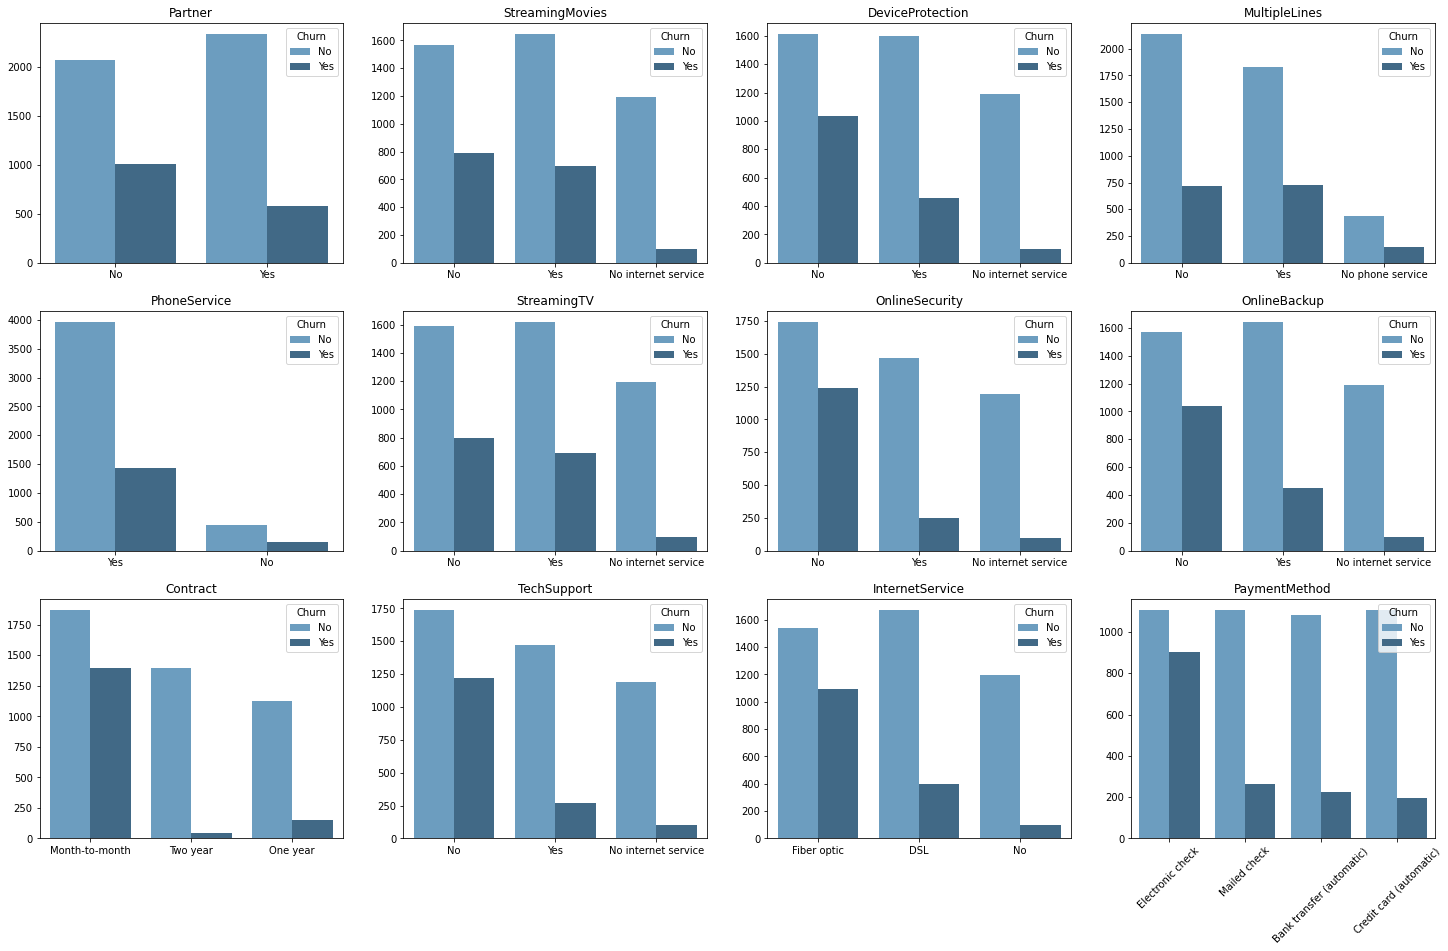

In [ ]:
# Plot Features

def plot_chart(cols,fz=(25,15), rot=0):
    fig, axes = plt.subplots(nrows=3, ncols=(len(cols)+1)//3, figsize=fz)
    for i, col in enumerate(cols):
        sns.countplot(x=col, data=data, hue='Churn', ax=axes[i%3,i//3], order=data[col].value_counts().index, palette="Blues_d")
        axes[i%3,i//3].set_title(col)
        axes[i%3,i//3].set_xlabel(None)
        axes[i%3,i//3].set_ylabel(None)
        xlabels = axes[i%3,i//3].get_xticklabels()
        if col == 'PaymentMethod':
          axes[i%3,i//3].set_xticklabels(xlabels, rotation=45)
        else:
          axes[i%3,i//3].set_xticklabels(xlabels, rotation=rot)
 
    for i in range(len(cols), len(axes.flatten()) ):
        fig.delaxes(axes.flatten()[i])

# Plot the first type - accept only Yes/No
plot_chart(['Partner', 'PhoneService', 'Contract','StreamingMovies', 'StreamingTV', 
            'TechSupport', 'DeviceProtection', 'OnlineSecurity', 'InternetService', 
            'MultipleLines', 'OnlineBackup', 'PaymentMethod'])

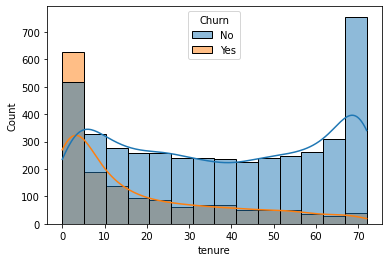

In [ ]:
sns.histplot(data=data, hue='Churn', x="tenure", kde=True)

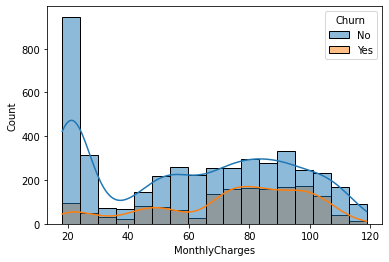

In [ ]:
sns.histplot(data=data, hue='Churn', x="MonthlyCharges", kde=True)

##### Plot Insight:

###### 1. Paperless Billing
The churn rate of the client uses paperless billing is higher than the churn rate of the client use paper billing.
###### 2. Gender
The churn rate of male is higher than the churn rate of female.
###### 3. Senior Citizen
The churn rate of senior citizens is higher than the churn rate of non-seniors.
###### 4. Partner
The churn rate of customers without partners is higher than the churn rate of customers with partners.
###### 5. Dependents
The churn rate of the customer has not dependents is higher than the churn rate of customer has dependents.
###### 6. Phone Service
The churn rate for phone service connected is higher than no phone service connected.
###### 7. Contract
The churn rate for month-to-month contracts is higher than for other contract terms.
###### 8. Streaming Movies
The churn rate for the streaming cinema service not activated is higher than for other streaming cinema service terms.
###### 9. Streaming TV
The churn rate for the streaming TV service not activated is higher than for other streaming TV service terms.
###### 10. Tech Support
The churn rate for  the technical support service not connected is higher than for other technical support service terms.
###### 11. Device Protection
The churn rate for  the client have not equipment insurance is higher than for other.
###### 12. Online Security
The churn rate for  the online security service not connected is higher than for other online security service terms.
###### 13. Internet Service
Customers with InternetService fiber optic as part of their contract have much higher churn rate.
###### 14. Multiple Lines
The churn rate for  multiple phone lines not connected is higher than for other  terms.
###### 15. Online Backup
The churn rate for online backup service not activated is higher than for other online backup service terms.
###### 16. Payment Method
Payment method electronic check shows much higher churn rate than other payment methods.
###### 17. Tenure
someone who has been a client of the company for less than 5 months has the potential to become an unfaithful customer.
###### 18. Monthly Charges
Disloyal customers tend to pay the more important fees, which are between 65 and 105 dollar. Loyal customers tend to pay more important fees ranging from less than 30

# Data Preparation

In [ ]:
# check the number of missing values
data.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# check frequency from unique data
for i in data.columns:
  print(i)
  print(data[i].value_counts())
  print('-'*10)

Unnamed: 0
2047    1
4687    1
581     1
6726    1
4679    1
       ..
1258    1
3307    1
5356    1
1262    1
0       1
Name: Unnamed: 0, Length: 5986, dtype: int64
----------
customerID
9258-CNWAC    1
1371-WEPDS    1
7010-ZMVBF    1
3683-QKIUE    1
7674-YTAFD    1
             ..
4256-ZWTZI    1
8450-LUGUK    1
1017-FBQMM    1
4801-KFYKL    1
1393-IMKZG    1
Name: customerID, Length: 5986, dtype: int64
----------
gender
Male      3050
Female    2936
Name: gender, dtype: int64
----------
SeniorCitizen
0    5020
1     966
Name: SeniorCitizen, dtype: int64
----------
Partner
No     3082
Yes    2904
Name: Partner, dtype: int64
----------
Dependents
No     4195
Yes    1791
Name: Dependents, dtype: int64
----------
tenure
1     510
72    308
2     194
3     169
4     154
     ... 
44     47
45     47
39     44
36     43
0      10
Name: tenure, Length: 73, dtype: int64
----------
PhoneService
Yes    5396
No      590
Name: PhoneService, dtype: int64
----------
MultipleLines
No              

In [ ]:
# converting Total Charges to a numerical data type.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [ ]:
# removing missing values in the data
data.dropna(inplace = True)
data.shape

(5976, 22)

In [ ]:
# remove customer IDs from the data set
data_1 = data.drop(['Unnamed: 0','customerID'], axis=1)
#Convertin the predictor variable in a binary numeric variable
data_1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_1['Churn'].replace(to_replace='No',  value=0, inplace=True)


In [ ]:
# Let's convert all the categorical variables into dummy variables
data_1 = pd.get_dummies(data_1)
data_1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1734.65,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,3973.20,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,2869.85,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,238.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,119.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0


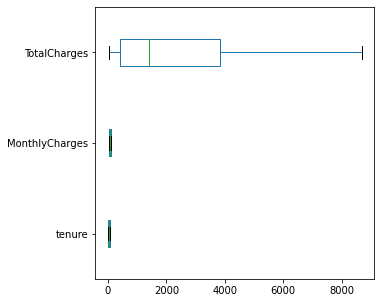

In [ ]:
# check outlier using boxplot
data_1.boxplot(column=['tenure', 'MonthlyCharges', 'TotalCharges'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

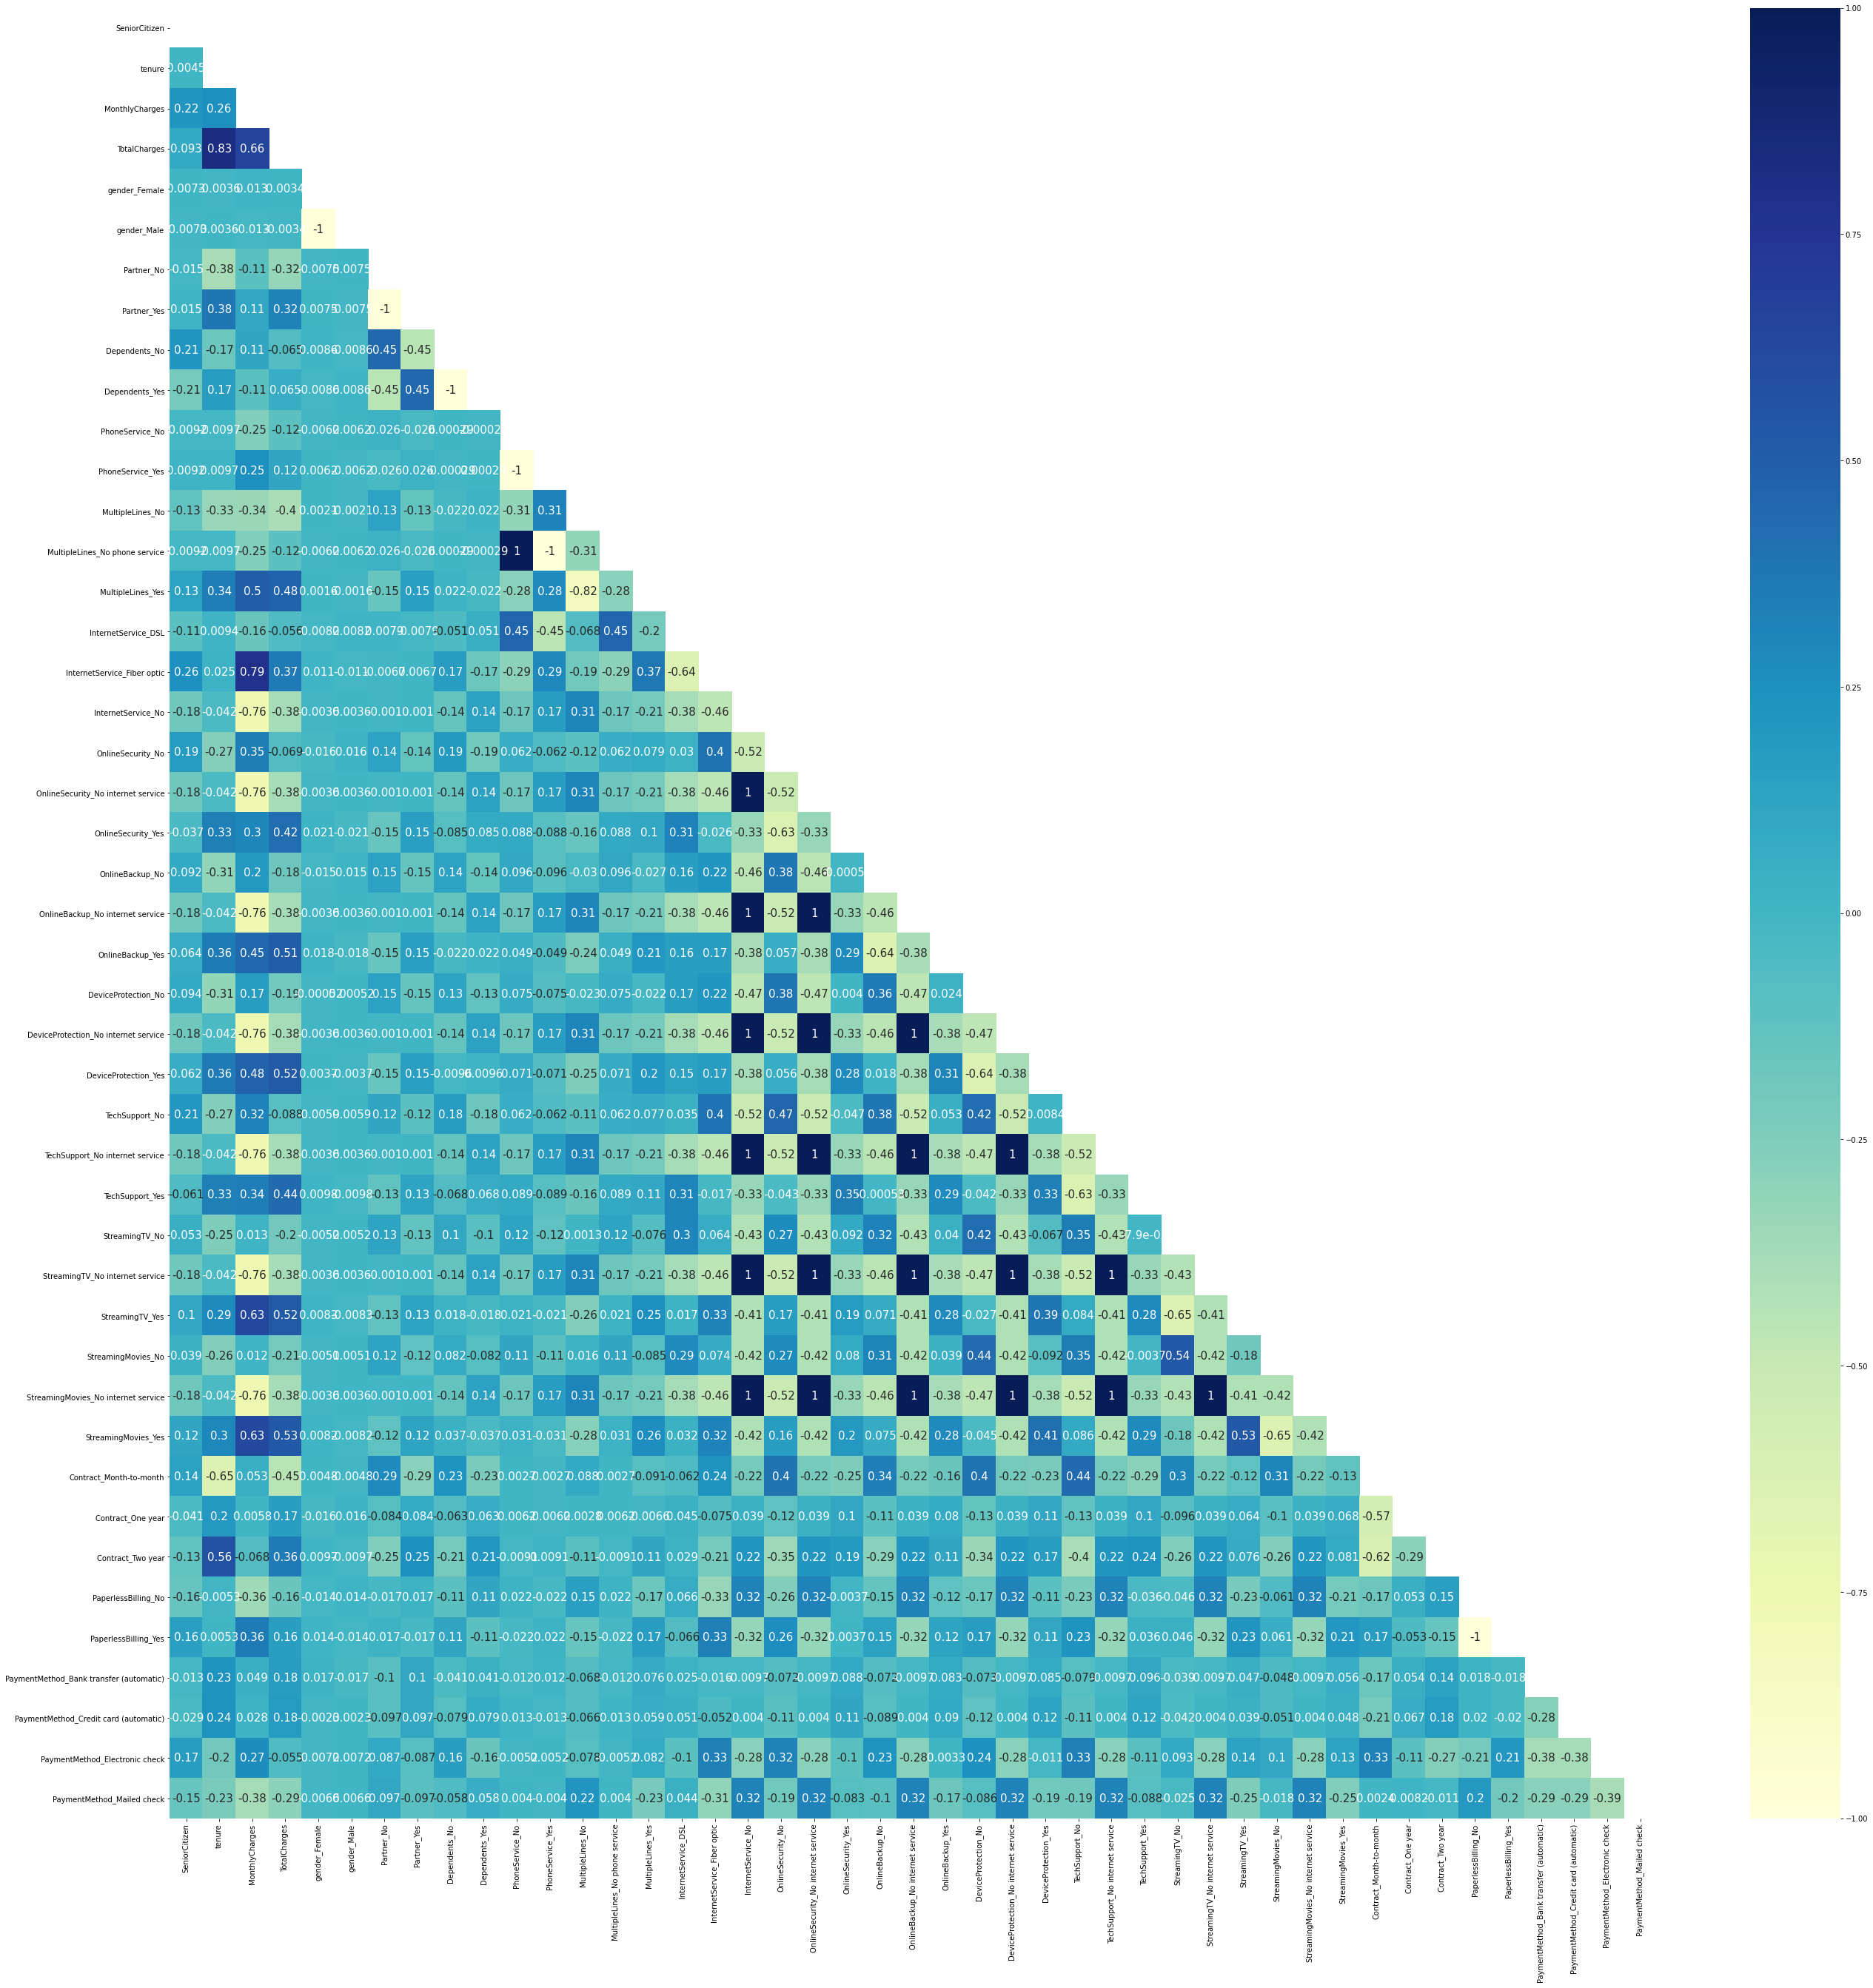

In [ ]:
import numpy as np

# check correlation between feature column

correlation_between_column = data_1.drop(['Churn'], axis=1).corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(45,45))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

Source for high correlation values
https://link.springer.com/article/10.1057/jt.2009.5

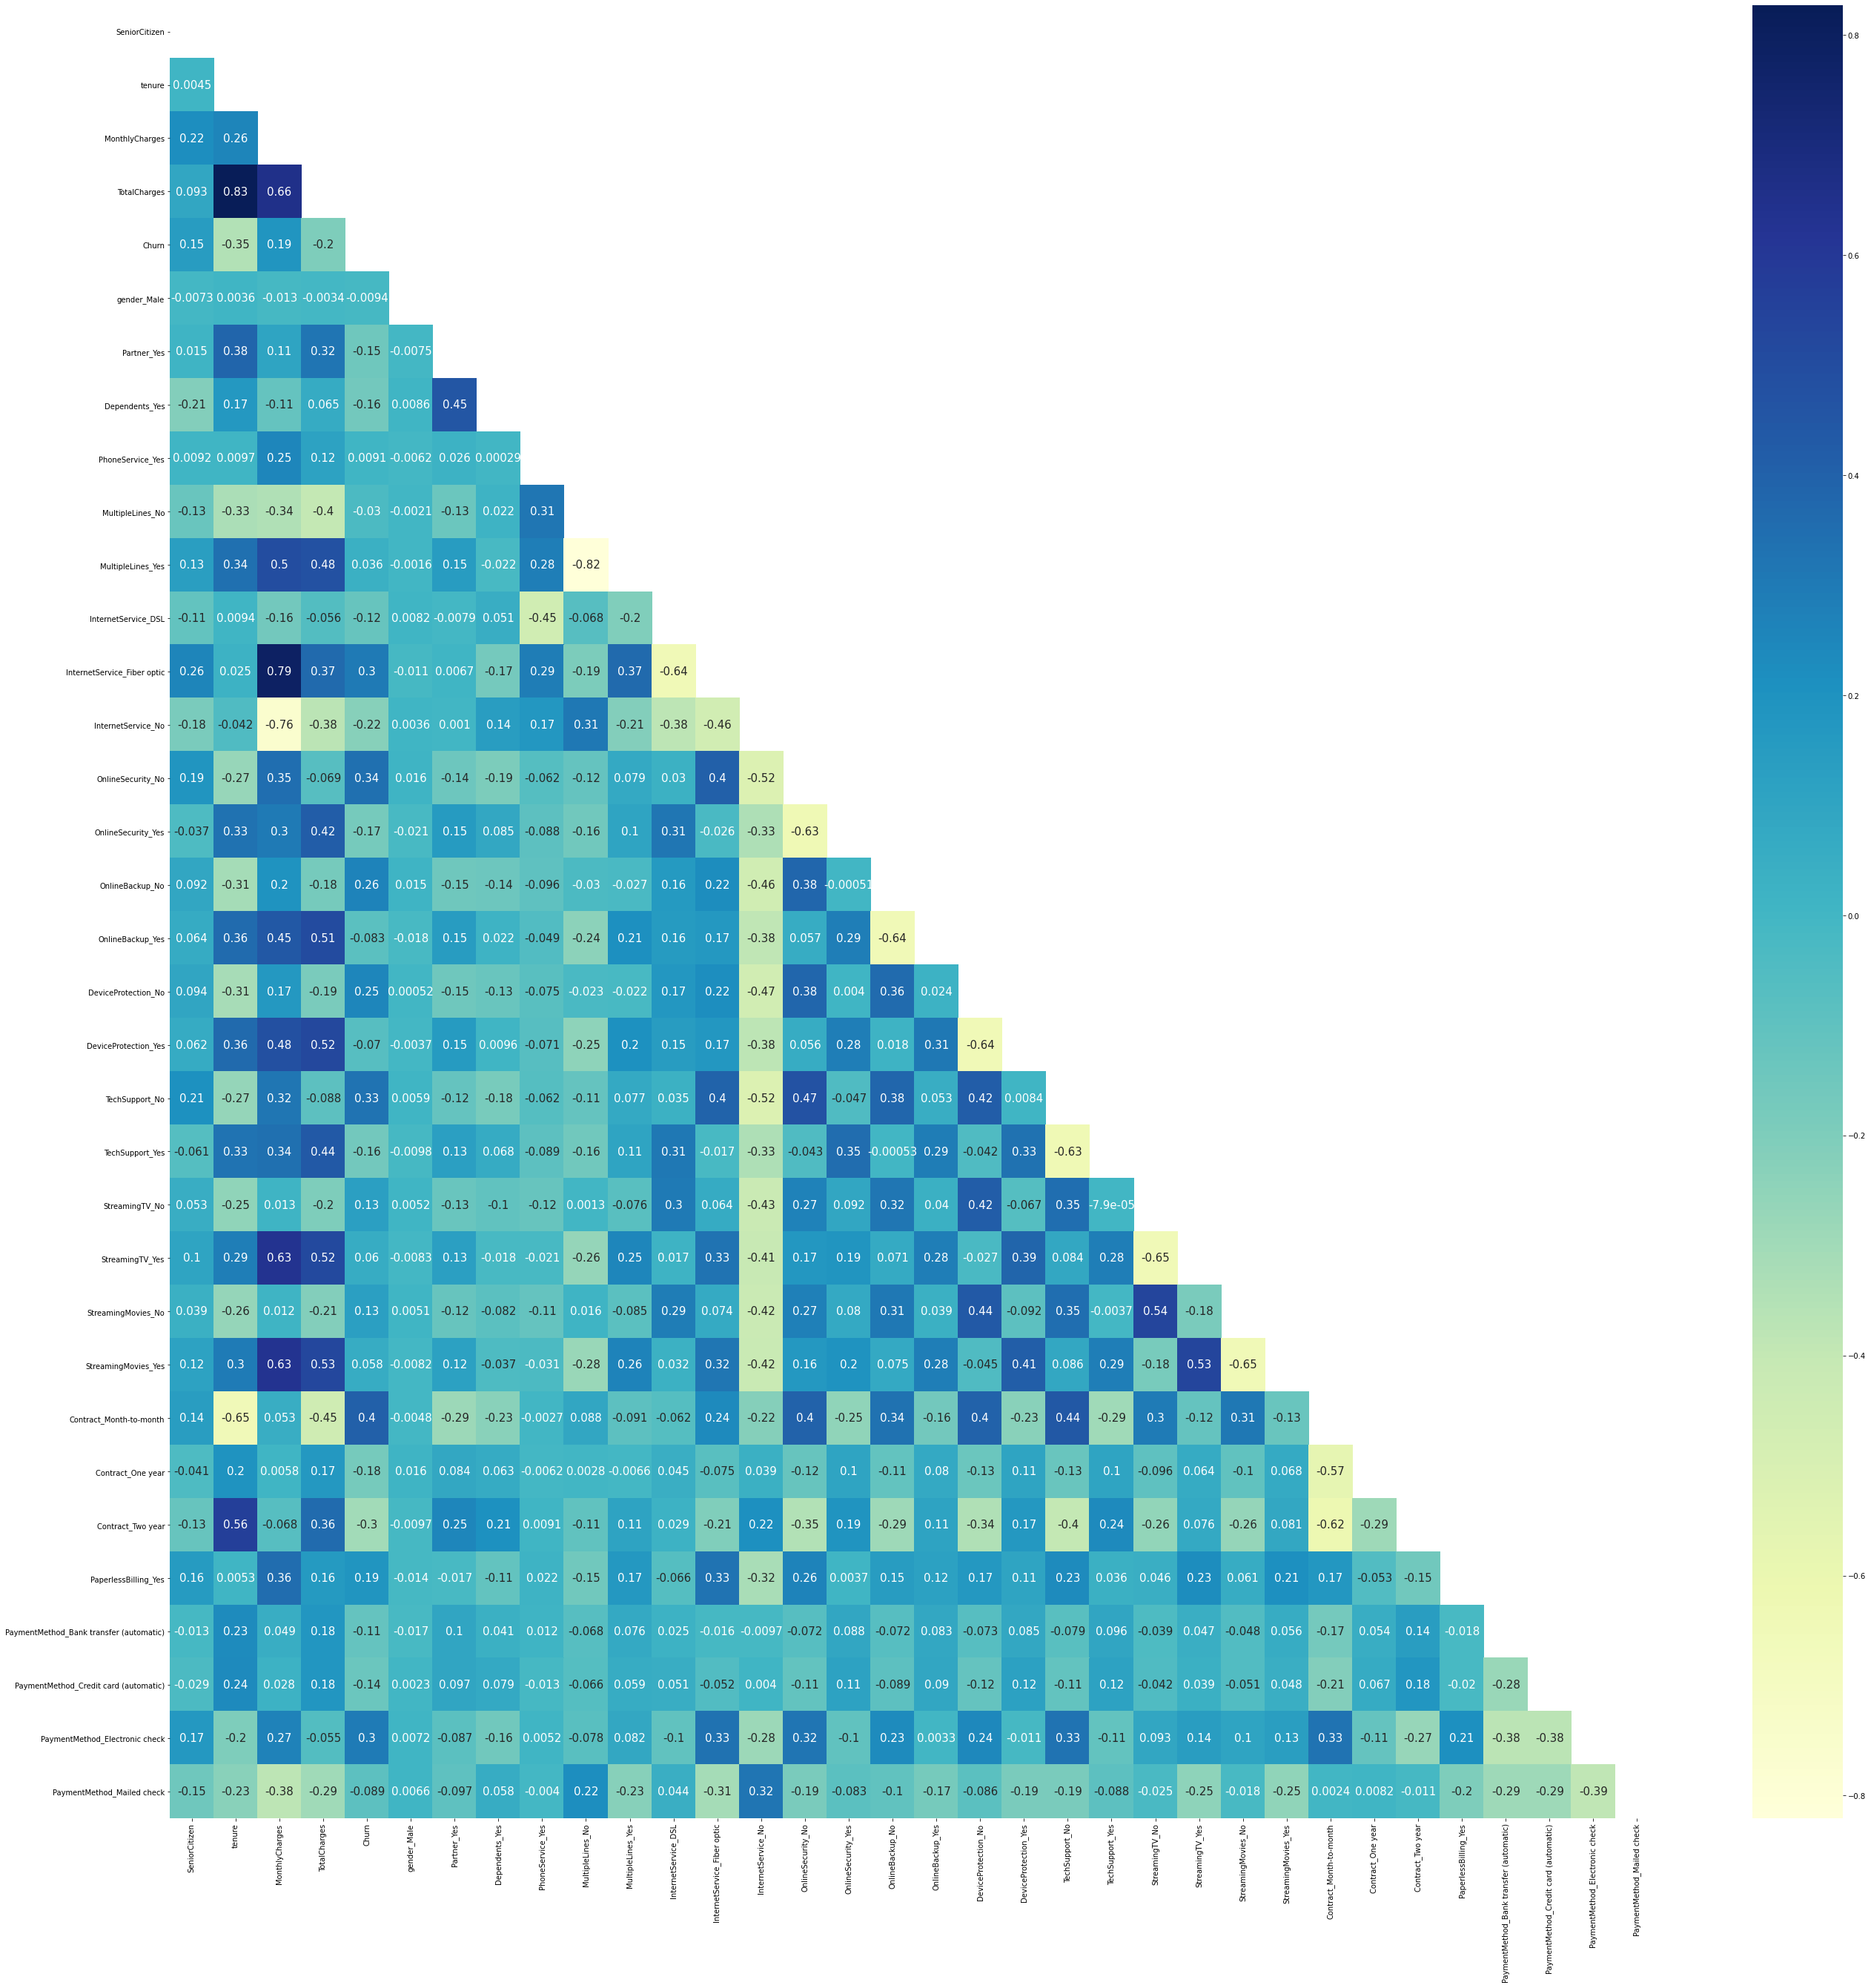

In [ ]:
# remove some features that cause high correlation values
data_11 = data_1.drop(['gender_Female','Partner_No','Dependents_No','PhoneService_No','PaperlessBilling_No','MultipleLines_No phone service',
                       'OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',
                       'TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'], axis=1)

correlation_between_column = data_11.corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(45,45))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

In [ ]:
# remove some features that cause high correlation values (I removed totalcharges because there is a correlation more than 0,7 with tenure)
data_ok = data_11.drop(['TotalCharges', 'MultipleLines_No'], axis=1)
data_ok.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,44,88.15,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0
2,1,38,74.95,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
3,0,4,55.90,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0
4,0,2,53.45,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0


In [ ]:
print(data_ok.shape)
data_ok_1 = data_ok.copy()

(5976, 32)


# Preparation for Modeling

In [ ]:
feature_tenure_MC = ['tenure','MonthlyCharges']
df_feature_tenure_MC = pd.DataFrame(data_ok, columns=feature_tenure_MC)
df_remaining = data_ok.drop(columns=feature_tenure_MC)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scX = MinMaxScaler(feature_range=(0,1))

In [ ]:
# scaling column tenure
rescaled_features = scX.fit_transform(df_feature_tenure_MC)
df_rescaled_feature = pd.DataFrame(rescaled_features, columns=feature_tenure_MC, index = df_remaining.index )
data_ok = pd.concat([df_remaining,df_rescaled_feature], axis=1)

In [ ]:
data_ok.head()

,SeniorCitizen,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges
0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1.000000,0.058209
1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0.605634,0.695522
2,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0.521127,0.564179
3,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0.042254,0.374627
4,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0.014085,0.350249


In [ ]:
# determine training data and test data
X = data_ok.drop(['Churn'], axis=1)
y = data_ok['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [ ]:
# solution for imbalance 
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before SMOTE : Counter({0: 3505, 1: 1275})
After SMOTE : Counter({0: 3505, 1: 3505})


# Modeling and Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

### Baseline model

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:

strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
  
test_scores = []
test_scores_recall = []
for s in strategies:
  if s =='constant':
    dclf = DummyClassifier(strategy = s, random_state = 0, constant = 0)
  else:
    dclf = DummyClassifier(strategy = s, random_state = 0)
  dclf.fit(X_train_smote, y_train_smote)
  score = dclf.score(X_test, y_test)
  score = round(score, 5)
  test_scores.append(score)
  y_predict = dclf.predict(X_test)
  score_recall = recall_score(y_test, y_predict)
  score_recall = round(score_recall, 5)
  test_scores_recall.append(score_recall)
  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


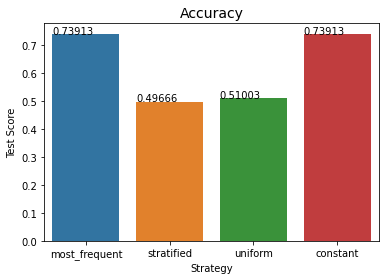

In [ ]:
ax = sns.barplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title('Accuracy',fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


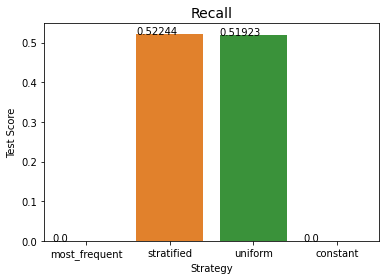

In [ ]:
ax = sns.barplot(strategies, test_scores_recall);
ax.set(xlabel ='Strategy', ylabel ='Test Score')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title('Recall',fontsize=14)
plt.show()

### KNN

In [ ]:
knn_1 = KNeighborsClassifier()
knn_1.fit( X_train_smote, y_train_smote )
pred_knn_1 = knn_1.predict( X_test )
y_train_pred_knn_1 = knn_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_knn_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_knn_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_knn_1))
print('Recall Test Data:',recall_score(y_test,pred_knn_1))

# confusing matrix
pd.crosstab(y_test,pred_knn_1)

Accuracy Train Data: 0.8584878744650499
Accuracy Test Data: 0.6948160535117057
Recall Train Data: 0.9586305278174037
Recall Test Data: 0.7564102564102564


col_0,0,1
Churn,,
0,595,289
1,76,236


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_knn_1))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77       884
           1       0.45      0.76      0.56       312

    accuracy                           0.69      1196
   macro avg       0.67      0.71      0.66      1196
weighted avg       0.77      0.69      0.71      1196



### Logistic Regression

In [ ]:
logreg_1 = LogisticRegression()
logreg_1.fit( X_train_smote, y_train_smote )
pred_logreg_1 = logreg_1.predict( X_test )
y_train_pred_logreg_1 = logreg_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_logreg_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_logreg_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_logreg_1))
print('Recall Test Data:',recall_score(y_test,pred_logreg_1))

# confusion matrix
pd.crosstab(y_test,pred_logreg_1)

Accuracy Train Data: 0.7703281027104137
Accuracy Test Data: 0.7449832775919732
Recall Train Data: 0.7957203994293865
Recall Test Data: 0.8044871794871795


col_0,0,1
Churn,,
0,640,244
1,61,251


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_logreg_1))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81       884
           1       0.51      0.80      0.62       312

    accuracy                           0.74      1196
   macro avg       0.71      0.76      0.71      1196
weighted avg       0.81      0.74      0.76      1196



### Random Forest

In [ ]:
model_rf_1 = RandomForestClassifier()
model_rf_1.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf_1 = model_rf_1.predict( X_test )
y_train_pred_rf_1 = model_rf_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_rf_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_rf_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_rf_1))
print('Recall Test Data:',recall_score(y_test,pred_rf_1))

# confusion matrix
pd.crosstab(y_test,pred_rf_1)

Accuracy Train Data: 0.998716119828816
Accuracy Test Data: 0.7817725752508361
Recall Train Data: 0.9994293865905849
Recall Test Data: 0.5961538461538461


col_0,0,1
Churn,,
0,749,135
1,126,186


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_rf_1))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       884
           1       0.58      0.60      0.59       312

    accuracy                           0.78      1196
   macro avg       0.72      0.72      0.72      1196
weighted avg       0.78      0.78      0.78      1196



### SVM

In [ ]:
model_svc_1 = SVC()
model_svc_1.fit(X_train_smote, y_train_smote)
pred_model_svc_1 = model_svc_1.predict(X_test)
y_train_pred_svc_1 = model_svc_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_svc_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_model_svc_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_svc_1))
print('Recall Test Data:',recall_score(y_test,pred_model_svc_1))

# confusing matrix
pd.crosstab(y_test,pred_model_svc_1)

Accuracy Train Data: 0.8455064194008559
Accuracy Test Data: 0.7583612040133779
Recall Train Data: 0.882453637660485
Recall Test Data: 0.7467948717948718


col_0,0,1
Churn,,
0,674,210
1,79,233


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_model_svc_1))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       884
           1       0.53      0.75      0.62       312

    accuracy                           0.76      1196
   macro avg       0.71      0.75      0.72      1196
weighted avg       0.80      0.76      0.77      1196



### AdaBoost

In [ ]:
# AdaBoost Algorithm
AB_1 = AdaBoostClassifier()
AB_1.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
pred_AB_1 = AB_1.predict( X_test )
y_train_pred_ada_1 = AB_1.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_ada_1))
print('Accuracy Test Data:',accuracy_score(y_test,pred_AB_1))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_ada_1))
print('Recall Test Data:',recall_score(y_test,pred_AB_1))

# confusion matrix
pd.crosstab(y_test,pred_AB_1)

Accuracy Train Data: 0.818830242510699
Accuracy Test Data: 0.7558528428093646
Recall Train Data: 0.8579172610556348
Recall Test Data: 0.7532051282051282


col_0,0,1
Churn,,
0,669,215
1,77,235


In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_AB_1))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       884
           1       0.52      0.75      0.62       312

    accuracy                           0.76      1196
   macro avg       0.71      0.75      0.72      1196
weighted avg       0.80      0.76      0.77      1196



In [ ]:
predictions = {'pred_knn_1':pred_knn_1, 'pred_logreg_1':pred_logreg_1, 'pred_rf_1':pred_rf_1, 'pred_model_svc_1':pred_model_svc_1, 'pred_AB_1':pred_AB_1}

pred_knn_1 : 0.7078619909502263
pred_logreg_1 : 0.759709653092006
pred_rf_1 : 0.7217194570135747
pred_model_svc_1 : 0.7546191553544495
pred_AB_1 : 0.7549962292609351


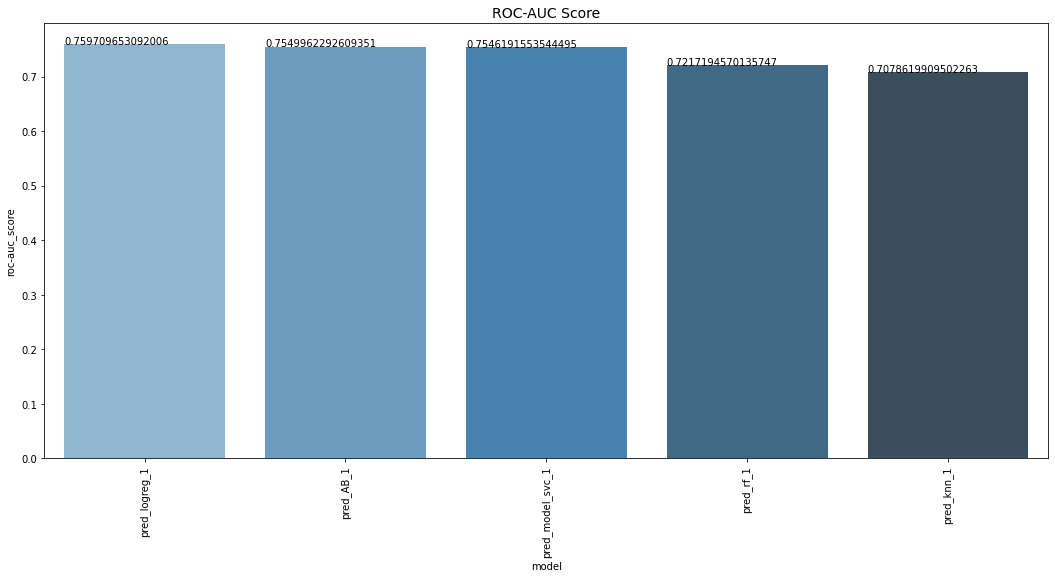

In [ ]:
a = []
b = []
for j,k in predictions.items():
  a.append(j)
  b.append(roc_auc_score(y_test,k))
  print(j, ':', roc_auc_score(y_test,k))
score = pd.DataFrame({'model':a, 'roc-auc_score':b})
score = score.sort_values(by='roc-auc_score',ascending=False)
plt.figure(figsize = (18,8))
plt.title('ROC-AUC Score',fontsize=14)
s = sns.barplot(x='model', y='roc-auc_score', data=score, palette="Blues_d")
s.set_xticklabels(s.get_xticklabels(),rotation=90)

for p in s.patches:
        s.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.show()


Based on the evaluation, on this topic the logistic regression model is more suitable than the others due to the highest roc-auc value compared to others and the difference in accuracy and recall values of train data and small test data.

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [ ]:
# determine the best parameters for the Logistic Regression model
model = LogisticRegression()
param_grid ={'C':np.arange(-15, 15, .1), 'penalty':['l1', 'l2', 'elasticnet'],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='recall', cv=5)
gscv.fit(X_train_smote, y_train_smote)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/loca

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([-1.50000000e+01, -1...
        1.38000000e+01,  1.39000000e+01,  1.40000000e+01,  1.41000000e+01,
        1.42000000e+01,  1.43000000e+01,  1.44000000e+01,  1.45000000e+01,
        1.46000000e+01,  1.47000000e+01,  1.48000000e+01,  1.49000000e+01]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
 

In [ ]:
gscv.best_params_

{'C': 0.09999999999994635, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
logreg = LogisticRegression(C= 0.09999999999994635, penalty='l1', solver= 'liblinear')
logreg.fit( X_train_smote, y_train_smote )
pred_logreg = logreg.predict( X_test )
y_train_pred_logreg = logreg.predict(X_train_smote)

# the accuracy of this model in the Test set
print('Accuracy Train Data:',accuracy_score(y_train_smote,y_train_pred_logreg))
print('Accuracy Test Data:',accuracy_score(y_test,pred_logreg))
print('Recall Train Data:',recall_score(y_train_smote,y_train_pred_logreg))
print('Recall Test Data:',recall_score(y_test,pred_logreg))

# confusion matrix
pd.crosstab(y_test,pred_logreg)

Accuracy Train Data: 0.7706134094151212
Accuracy Test Data: 0.7374581939799331
Recall Train Data: 0.8037089871611983
Recall Test Data: 0.8141025641025641


col_0,0,1
Churn,,
0,628,256
1,58,254


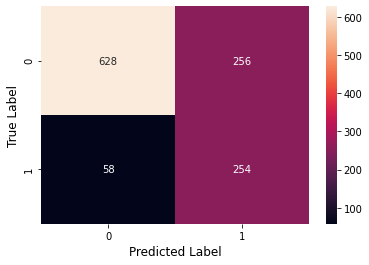

In [ ]:
import sklearn.metrics as metrics

confusion_matrix = metrics.confusion_matrix(y_test,pred_logreg)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
# displays a report containing the accuracy of the model in the Test set
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       884
           1       0.50      0.81      0.62       312

    accuracy                           0.74      1196
   macro avg       0.71      0.76      0.71      1196
weighted avg       0.81      0.74      0.75      1196



In [ ]:
roc_auc_score(y_test,pred_logreg)

0.7622549019607843

### SHAPE Importance

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 3.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491631 sha256=edee3f9d70ae50159f453ba3a8edb104ff3775f4f8ad33872aa6e1382eec28a7
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
masker = shap.maskers.Independent(data=X_importance)
explainer = shap.LinearExplainer(logreg, masker=masker)
shap_values = explainer.shap_values(X_importance)

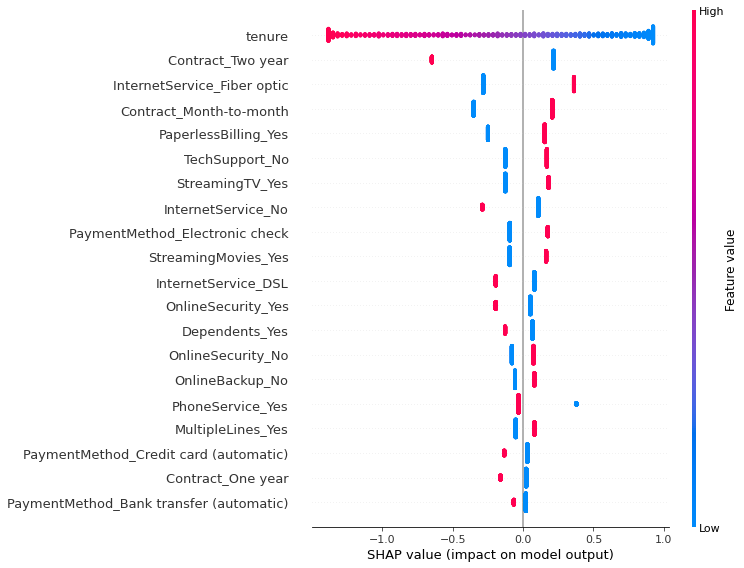

In [ ]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

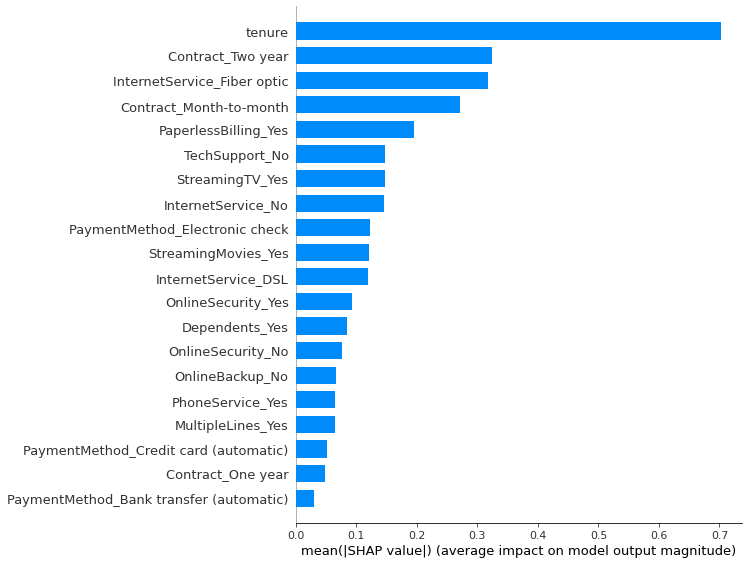

In [ ]:
# Plot summary_plot as barplot:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

# Simulation

In [ ]:
X_output = X_test.copy()
X_output['churn']=pred_logreg
X_output = X_output[X_output['churn']==1]
X_output = X_output.drop(['churn'], axis=1)
X_output.index=X_output.index.astype(str, copy = False)
X_output

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges
5968,1,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0.366197,0.520398
4339,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0.042254,0.518905
2587,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0.084507,0.552239
4779,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0.661972,0.803483
2790,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0.014085,0.263184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0.492958,0.861194
5952,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0.000000,0.561692
831,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0.028169,0.828856
2994,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0.591549,0.758706


In [ ]:
data_ok_1.index=data_ok_1.index.astype(str, copy = False)
data_ok_1

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,44,88.15,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0
2,1,38,74.95,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
3,0,4,55.90,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0
4,0,2,53.45,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,95.00,1,1,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0
5982,0,23,91.10,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0
5983,0,12,21.15,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
5984,1,12,99.45,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0


In [ ]:
data_ok_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '5976', '5977', '5978', '5979', '5980', '5981', '5982', '5983', '5984',
       '5985'],
      dtype='object', length=5976)

In [ ]:
X_data = data_ok_1.loc[X_output.index]
X_data

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5968,1,27,70.55,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0
4339,0,4,70.40,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0
2587,1,7,73.75,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
4779,1,48,99.00,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0
2790,1,2,44.70,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,0,36,104.80,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0
5952,0,1,74.70,1,0,1,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0
831,0,3,101.55,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0
2994,1,43,94.50,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0


In [ ]:
X_data['Churn'].value_counts()

0    256
1    254
Name: Churn, dtype: int64

In [ ]:
X_data = X_data.drop(['Churn'], axis=1)
X_data

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5968,1,27,70.55,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0
4339,0,4,70.40,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0
2587,1,7,73.75,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
4779,1,48,99.00,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0
2790,1,2,44.70,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,0,36,104.80,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0
5952,0,1,74.70,0,1,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0
831,0,3,101.55,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0
2994,1,43,94.50,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0


For example, a company will provide subsidies to consumers who have predicted that they will switch services to other companies by grouping consumers based on the 3 most important features and the amount of money consumers spend per month for the services used.

In [ ]:
X_output_1=X_output[['tenure','MonthlyCharges','InternetService_Fiber optic','Contract_Two year']]
X_output_1

,tenure,MonthlyCharges,InternetService_Fiber optic,Contract_Two year
5968,0.366197,0.520398,1,0
4339,0.042254,0.518905,1,0
2587,0.084507,0.552239,1,0
4779,0.661972,0.803483,1,0
2790,0.014085,0.263184,0,0
...,...,...,...,...
5480,0.492958,0.861194,1,0
5952,0.000000,0.561692,1,0
831,0.028169,0.828856,1,0
2994,0.591549,0.758706,1,0


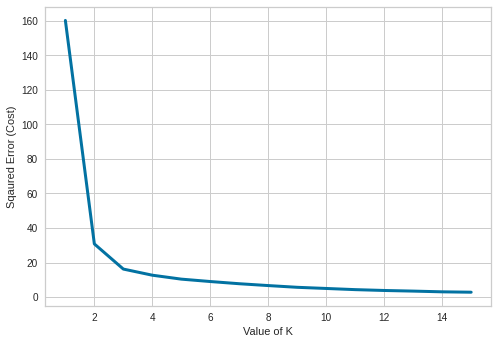

In [ ]:
from sklearn.cluster import KMeans
# Elbow method
cost =[]
for i in range(1, 16):
    KM = KMeans(n_clusters = i, max_iter = 1000)
    KM.fit(X_output_1)
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 16), cost, color ='b', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show()

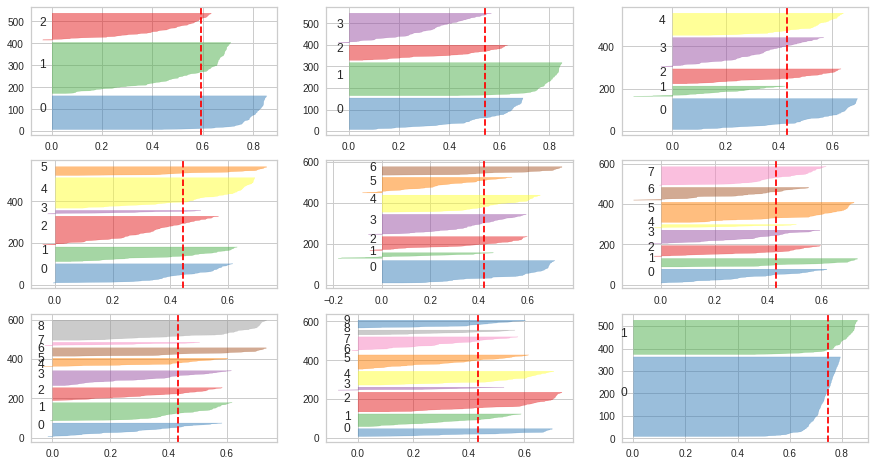

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_output_1)

In [ ]:
import sklearn.metrics as metrics
for i in range(2,11):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=42).fit(X_output_1).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X_output_1,labels,metric="euclidean",sample_size=1000,random_state=42)))

Silhouette score for k(clusters) = 2 is 0.7453602496466655
Silhouette score for k(clusters) = 3 is 0.5932892012153594
Silhouette score for k(clusters) = 4 is 0.5428655663096994
Silhouette score for k(clusters) = 5 is 0.43177292223097724
Silhouette score for k(clusters) = 6 is 0.4460512606696628
Silhouette score for k(clusters) = 7 is 0.42051451048638966
Silhouette score for k(clusters) = 8 is 0.4303076695518588
Silhouette score for k(clusters) = 9 is 0.43086112811074656
Silhouette score for k(clusters) = 10 is 0.4328018446578518


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Inertia of Cosine k-Means versus number of clusters')

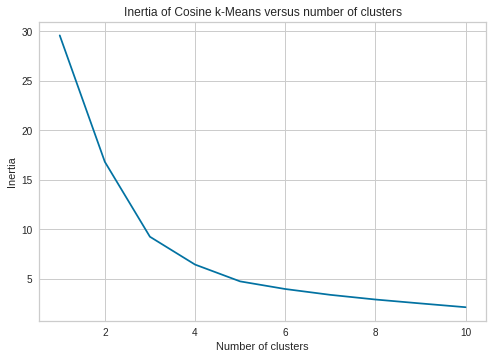

In [ ]:
from sklearn import preprocessing
normalized_vectors = preprocessing.normalize(X_output_1)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(10)]
sns.lineplot(np.arange(1, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

In [ ]:
import sklearn.metrics as metrics
for i in range(2,11):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=42).fit(normalized_vectors).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(normalized_vectors,labels,metric="euclidean",sample_size=1000,random_state=42)))

Silhouette score for k(clusters) = 2 is 0.7196647363365287
Silhouette score for k(clusters) = 3 is 0.7267317482825371
Silhouette score for k(clusters) = 4 is 0.559557046206268
Silhouette score for k(clusters) = 5 is 0.5596520873744002
Silhouette score for k(clusters) = 6 is 0.5164896518670716
Silhouette score for k(clusters) = 7 is 0.5226991479191733
Silhouette score for k(clusters) = 8 is 0.48534390978724157
Silhouette score for k(clusters) = 9 is 0.4830710519621955
Silhouette score for k(clusters) = 10 is 0.5005939617725295


In [ ]:
from sklearn.metrics import silhouette_score

# Prepare models
kmeans = KMeans(n_clusters=2).fit(X_output_1)
normalized_vectors = preprocessing.normalize(X_output_1)
normalized_kmeans = KMeans(n_clusters=3).fit(normalized_vectors)

# Print results
print('kmeans: {}'.format(silhouette_score(X_output_1, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))

kmeans: 0.7453602496466655
Cosine kmeans:0.8790300325241556


In [ ]:
data_clust = X_data.copy()
data_clust['Cluster'] = normalized_kmeans.labels_
data_clust.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster
5968,1,27,70.55,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1
4339,0,4,70.40,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1
2587,1,7,73.75,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1
4779,1,48,99.00,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
2790,1,2,44.70,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,2


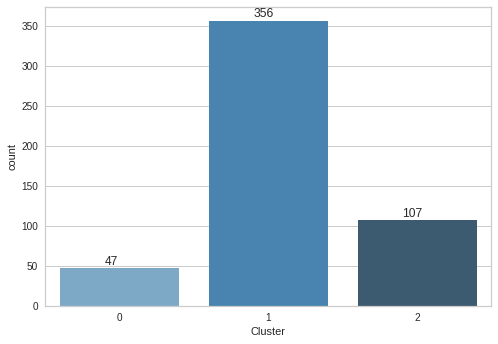

In [ ]:
ax= sns.countplot(x='Cluster', data=data_clust, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

In [ ]:
df =data_clust.groupby('Cluster').mean()
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.170213,18.872340,44.290426,0.531915,0.276596,0.063830,0.382979,0.127660,0.957447,0.0,0.042553,0.808511,0.148936,0.638298,0.319149,0.702128,0.255319,0.765957,0.191489,0.553191,0.404255,0.595745,0.361702,0.936170,0.063830,0.000000,0.765957,0.106383,0.148936,0.510638,0.234043
1,0.292135,20.384831,87.125843,0.483146,0.370787,0.143258,1.000000,0.553371,0.000000,1.0,0.000000,0.865169,0.134831,0.654494,0.345506,0.665730,0.334270,0.851124,0.148876,0.511236,0.488764,0.533708,0.466292,0.963483,0.033708,0.002809,0.806180,0.146067,0.109551,0.679775,0.064607
2,0.121495,3.588785,45.533645,0.532710,0.196262,0.168224,0.728972,0.140187,0.925234,0.0,0.074766,0.803738,0.121495,0.738318,0.186916,0.803738,0.121495,0.757009,0.168224,0.691589,0.233645,0.747664,0.177570,0.981308,0.018692,0.000000,0.626168,0.065421,0.121495,0.373832,0.439252


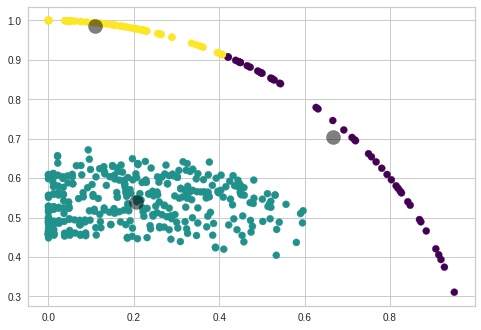

In [ ]:
y_normalized_kmeans = normalized_kmeans.predict(normalized_vectors)
plt.scatter(normalized_vectors[:, 0], normalized_vectors[:, 1], c=y_normalized_kmeans, s=50, cmap='viridis')
centers = normalized_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

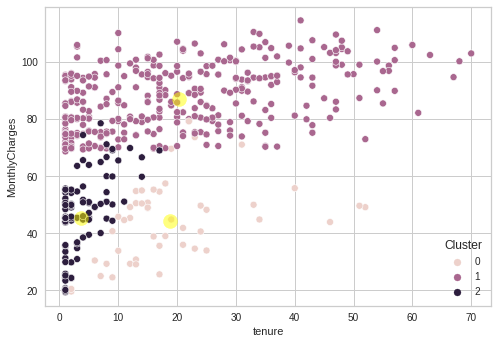

In [ ]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', data=data_clust)

plt.scatter(x='tenure', y='MonthlyCharges', data=df, c='yellow', s=200, alpha=0.5)

In [ ]:
data_clust_subsidy = data_clust.copy()
data_clust_subsidy['subsidy'] = data_clust_subsidy['Cluster']
data_clust_subsidy['subsidy'] = data_clust_subsidy['subsidy'].replace(0, 10)
data_clust_subsidy['subsidy'] = data_clust_subsidy['subsidy'].replace(1, 25)
data_clust_subsidy['subsidy'] = data_clust_subsidy['subsidy'].replace(2, 15)
data_clust_subsidy

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,Cluster,subsidy
5968,1,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0.366197,0.520398,1,25
4339,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0.042254,0.518905,1,25
2587,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0.084507,0.552239,1,25
4779,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0.661972,0.803483,1,25
2790,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0.014085,0.263184,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0.492958,0.861194,1,25
5952,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0.000000,0.561692,1,25
831,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0.028169,0.828856,1,25
2994,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0.591549,0.758706,1,25


In [ ]:
fb=data_clust[data_clust['InternetService_Fiber optic']==1]
fb

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,Cluster
5968,1,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0.366197,0.520398,1
4339,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0.042254,0.518905,1
2587,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0.084507,0.552239,1
4779,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0.661972,0.803483,1
5732,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0.873239,0.837313,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0.014085,0.610448,1
5480,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0.492958,0.861194,1
5952,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0.000000,0.561692,1
831,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0.028169,0.828856,1


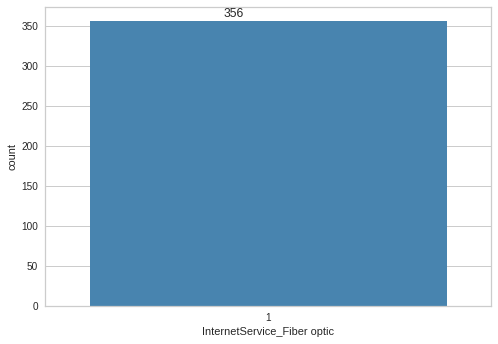

In [ ]:
ax= sns.countplot(x='InternetService_Fiber optic', data=fb, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

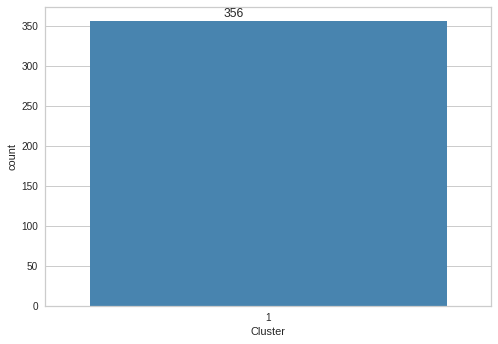

In [ ]:
ax= sns.countplot(x='Cluster', data=fb, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

In [ ]:
fb1=data_clust[data_clust['InternetService_Fiber optic']==0]
fb1=fb1[fb1['InternetService_DSL']==1]
fb1

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,Cluster
2790,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0.014085,0.263184,2
627,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0.281690,0.235323,0
4626,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0.000000,0.317413,2
84,0,1,0,0,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0.042254,0.333333,2
4825,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0.098592,0.482090,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0.000000,0.069652,2
2657,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0.028169,0.185075,2
2787,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0.309859,0.163184,0
5552,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0.000000,0.368657,2


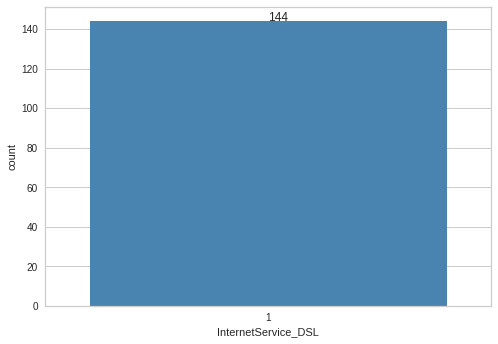

In [ ]:
ax= sns.countplot(x='InternetService_DSL', data=fb1, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.1))

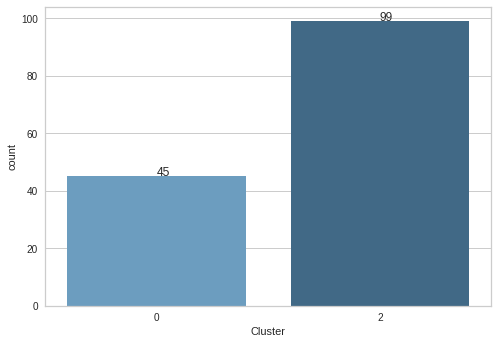

In [ ]:
ax= sns.countplot(x='Cluster', data=fb1, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.1))

In [ ]:
fb2=data_clust[data_clust['InternetService_Fiber optic']==0]
fb2=fb2[fb2['InternetService_DSL']==0]
fb2

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,Cluster
2047,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.014085,0.013930,0
2761,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.000000,0.016418,2
4771,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0.000000,0.074129,2
623,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.000000,0.025871,2
1563,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.000000,0.021891,2
1732,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.000000,0.011443,2
4195,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.000000,0.017910,2
5032,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.000000,0.014925,2
3840,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.014085,0.022886,0
4355,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0.000000,0.019403,2


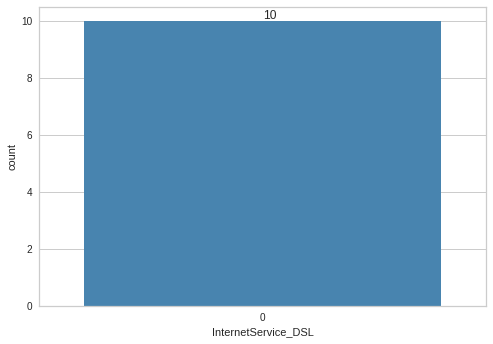

In [ ]:
ax= sns.countplot(x='InternetService_DSL', data=fb2, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.1))

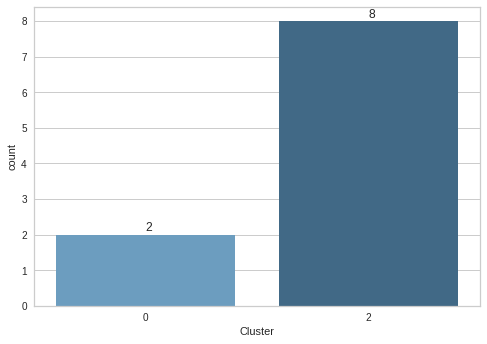

In [ ]:
ax= sns.countplot(x='Cluster', data=fb2, palette="Blues_d")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.1))

1.One example of a company's steps in retaining its customers is by providing subsidies or discounts. The following is an example of the funds needed by the company

In [ ]:
print('Subsidy churn:', data_clust_subsidy['subsidy'].sum())

Subsidy churn: 10975


In [ ]:
X_output_loyal = X_test.copy()
X_output_loyal['churn']=pred_logreg
X_output_loyal = X_output_loyal[X_output_loyal['churn']==0]
X_output_loyal = X_output_loyal.drop(['churn'], axis=1)
X_output_loyal 

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges
1757,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.985915,0.025871
1353,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.802817,0.020398
79,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.000000,0.068159
2097,0,1,1,1,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0.873239,0.861194
5432,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0.605634,0.757711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0,0,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0.943662,0.930348
5601,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0.535211,0.413930
1507,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1.000000,0.920896
927,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0.661972,0.210448


In addition, companies need to provide subsidies or discounts to consumers who are predicted to be loyal. It aims to increase the level of consumer loyalty. Suppose each consumer is given a subsidy or discount of 5 dollars

In [ ]:
print('Subsidy_loyal:', 686*5)

Subsidy_loyal: 3430


In [ ]:
print('Total Subsidy:', data_clust_subsidy['subsidy'].sum() + 686*5)

Total Subsidy: 14405


Note: there are several possibilities that will happen.
1. consumers are interested in discounts or subsidies
2. consumers are not interested in discounts or subsidies but still use the service
3. consumers are not interested in discounts or subsidies and switch services

2.Efforts to recruit new customers and ignore customers who are predicted to switch services:

TV ad cost: 115.000 dollar (30-second) </br>
TV ad production: 2.000 dollar (minimum cost) </br>
Total : 115.000 + 2.000 = 117.000 dollar

Note: there are several possibilities that will happen.
1. Can attract new customers as many as or more than customers who switch services
2. Unable to attract as many new customers as the number of consumers who moved